# Titanic Survival Prediction – Exploratory Data Analysis and Machine Learning


## Introduction
The Titanic dataset provides information about passengers aboard the Titanic.
The objective of this notebook is to analyze the dataset, perform data cleaning,
and build a machine learning model to predict passenger survival.

## Importing Required Libraries
In this section, we import the necessary Python libraries for data analysis,
visualization, and machine learning.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Importing Required Libraries
In this section, we import the necessary Python libraries for data analysis,
visualization, and machine learning.


In [2]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Understanding the Dataset
This section explores the basic structure of the dataset, including the number
of rows and columns, data types, and summary statistics.


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning
In this step, missing values are handled and unnecessary columns are removed
to prepare the data for machine learning.


In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipykernel_17/1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [7]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

/tmp/ipykernel_17/3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [8]:
df.drop('Cabin',axis=1,inplace=True)

In [9]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


## Encoding Categorical Variables
Machine learning models require numerical input, so categorical features such
as gender and embarkation port are converted into numerical values.


In [11]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

## Feature and Target Separation
The dataset is divided into input features (X) and the target variable (y),
where the target variable represents passenger survival.


In [12]:
X=df.drop('Survived',axis=1)
y=df['Survived']

## Train-Test Split
The dataset is split into training and testing sets to evaluate the model's
performance on unseen data.


In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Training
A Logistic Regression model is trained using the training dataset to learn
patterns related to passenger survival.


In [14]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## Model Evaluation
The trained model is evaluated using accuracy to measure its performance
on the test dataset.


In [15]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)


0.8100558659217877

## Conclusion
In this notebook, we performed basic exploratory data analysis, cleaned and
preprocessed the Titanic dataset, and trained a Logistic Regression model.
The model achieved an accuracy of approximately 81%, serving as a strong
baseline for survival prediction.


# Day 2: Exploratory Data Analysis (EDA)

In this section, we analyze relationships between different features
and passenger survival using visualizations.


## Survival Distribution
This plot shows the number of passengers who survived versus those who did not.


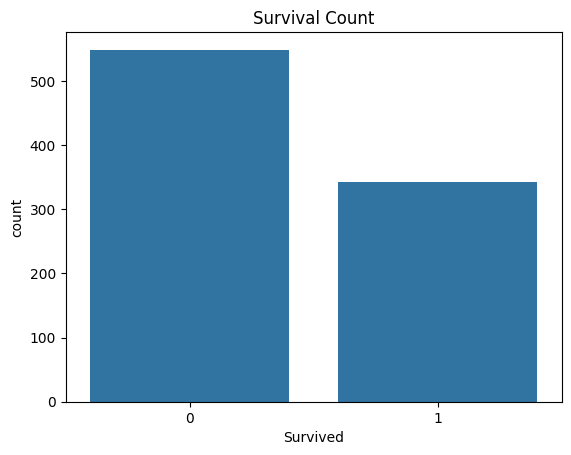

In [16]:
sns.countplot(x='Survived',data=df)
plt.title('Survival Count')
plt.show()

The dataset is slightly imbalanced, with a higher number of passengers not surviving
compared to those who survived. This imbalance is important to consider when
evaluating model performance.


## Survival by Gender
This visualization compares survival rates between male and female passengers.


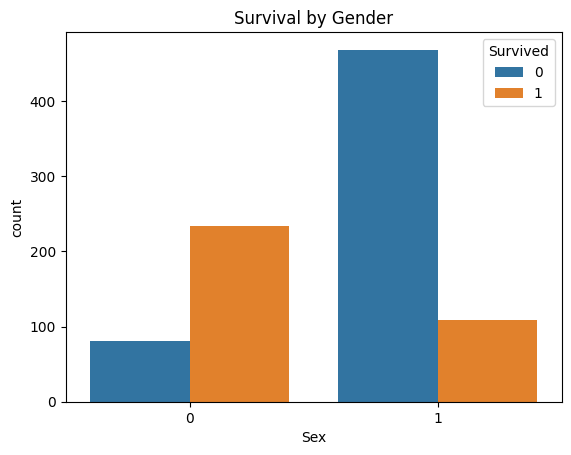

In [17]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


The visualization shows a strong relationship between gender and survival.
Female passengers had a significantly higher survival rate than male passengers,
reflecting the evacuation policy that prioritized women during the disaster.

## Survival by Passenger Class
This plot shows survival rates across different passenger classes.


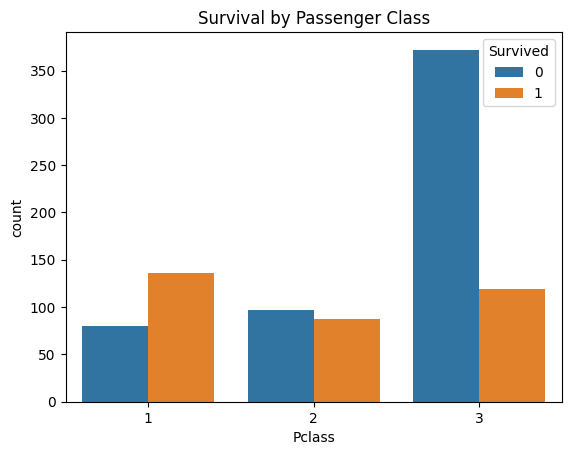

In [18]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()


Passenger class has a clear impact on survival. First-class passengers experienced
the highest survival rates, while third-class passengers had the lowest, indicating
that socio-economic status played a major role in survival outcomes.

## Age Distribution
This plot shows the distribution of passenger ages.


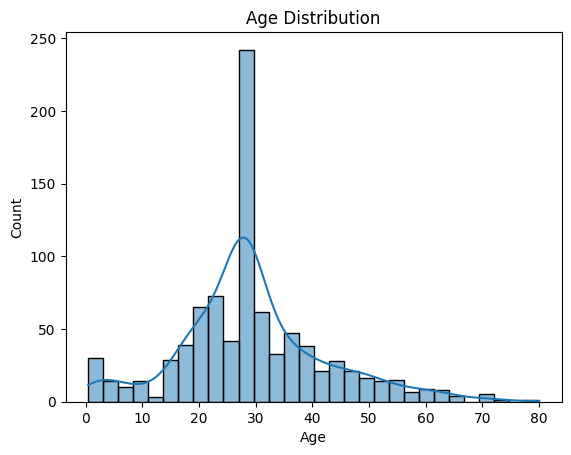

In [19]:
sns.histplot(df['Age'],bins=30,kde=True)
plt.title('Age Distribution')
plt.show()

Most passengers were young adults between 20 and 40 years of age.
The age distribution is slightly right-skewed, with fewer elderly passengers
and some age outliers present in the dataset.

## Age vs Survival
This plot compares age distributions for survivors and non-survivors.


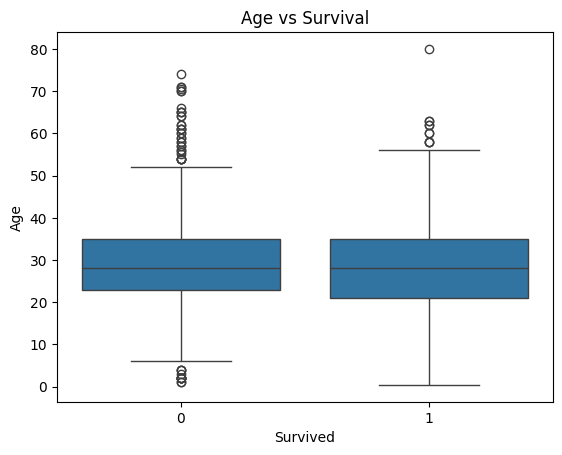

In [20]:
sns.boxplot(x='Survived',y='Age',data=df)
plt.title('Age vs Survival')
plt.show()

The age distributions of survivors and non-survivors have similar median values,
suggesting that age alone is not a strong predictor of survival. However, children
appear more frequently among survivors, indicating a secondary influence of age.

## Fare vs Survival
This plot compares ticket fare distributions for survivors and non-survivors.


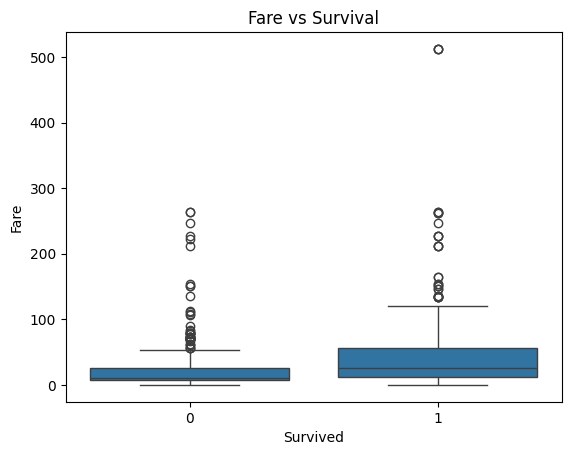

In [21]:
sns.boxplot(x='Survived',y='Fare',data=df)
plt.title('Fare vs Survival')
plt.show()

Passengers who survived generally paid higher fares than those who did not survive.
This indicates that higher socio-economic status and access to better facilities
increased the likelihood of survival.

## Correlation Heatmap
This heatmap shows correlations between numerical features.


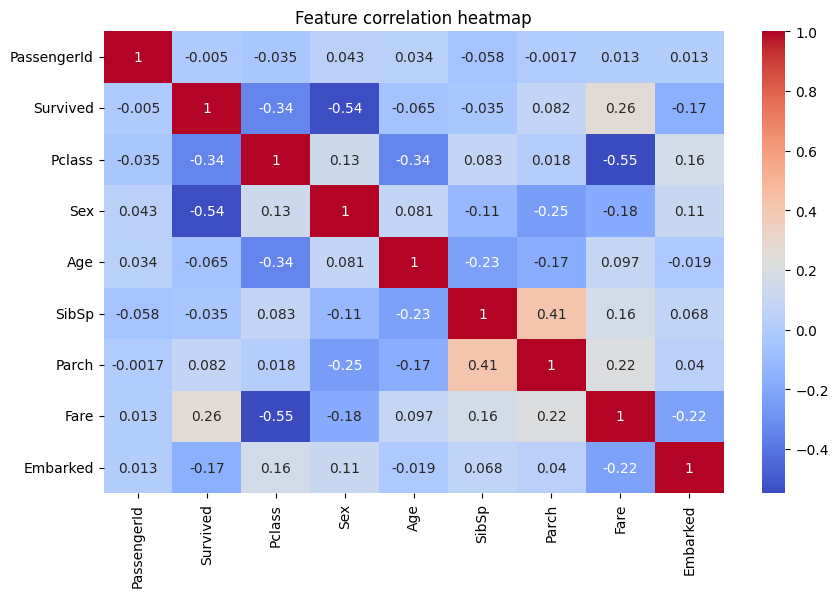

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Feature correlation heatmap')
plt.show()

The correlation heatmap reveals that survival is strongly associated with gender,
passenger class, and fare. Age and family-related features show weaker correlations,
suggesting that socio-economic factors had a greater influence on survival than
personal characteristics alone.

## Day 2 Conclusion
Exploratory Data Analysis revealed that gender, passenger class, age,
and fare play significant roles in survival. These insights explain
the effectiveness of the baseline Logistic Regression model.


# Day 3: Feature Engineering, Model Tuning, and Validation

In this section, feature engineering techniques were applied to improve
model representation, followed by Random Forest model tuning and
cross-validation to ensure stable and reliable performance.


## Feature Engineering

New features were created to capture meaningful patterns in passenger
behavior and relationships that were not directly represented in the
original dataset.


In [23]:
df['Familysize']=df['SibSp']+df['Parch']+1

### FamilySize Feature
The FamilySize feature combines siblings, spouses, parents, and children
into a single variable, representing the total number of family members
traveling together. This feature helps capture group-based survival behavior.


In [24]:
df['IsAlone']=0
df.loc[df['Familysize']==1,'IsAlone']=1

### IsAlone Feature
The IsAlone feature identifies passengers traveling alone. This binary
feature simplifies the representation of social support during evacuation,
which can influence survival outcomes.


In [25]:
df.drop(['SibSp','Parch','PassengerId'],axis=1,inplace=True)

### Feature Selection
Redundant features were removed after feature engineering. SibSp and Parch
were replaced by FamilySize, and PassengerId was dropped as it does not
provide predictive information.


In [26]:
X=df.drop('Survived',axis=1,)
y=df['Survived']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)


## Random Forest Model Training

A Random Forest classifier was selected due to its ability to capture
non-linear relationships and feature interactions. Initial training
provided strong performance, followed by regularization to reduce overfitting.


In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(
    n_estimators=200,
    random_state=42
    )
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [29]:
rf_pred=rf_model.predict(X_test)
accuracy_score(y_test,rf_pred)

0.8324022346368715

In [30]:
rf_model.score(X_train,y_train)

0.9789325842696629

In [31]:
rf_model.score(X_test, y_test)

0.8324022346368715

Before hyperparameter tuning, the Random Forest model achieved
approximately 83.2% accuracy on the test set.


In [32]:
rf_model=RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

In [33]:
rf_model=RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    min_samples_leaf=3,
    random_state=42
)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, n_estimators=200,
                       random_state=42)

### Model Regularization
Tree depth and minimum samples per leaf were adjusted to reduce model
complexity. Although training accuracy decreased, this tuning reduced
overfitting and improved generalization on unseen data.


In [34]:
rf_pred=rf_model.predict(X_test)
accuracy_score(y_test,rf_pred)

0.8156424581005587

## Cross-Validation

To validate model stability and performance, k-fold cross-validation
was applied. This approach evaluates the model across multiple data
splits, providing a more reliable estimate of real-world performance.


In [35]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf_model, X, y, cv=5, scoring='accuracy'
)

cv_scores
cv_scores.mean()


np.float64(0.8171050153788212)

### Cross-Validation Results
The model achieved a mean cross-validation accuracy of approximately
81.7%, confirming consistent performance across different data splits
and demonstrating good generalization.


## Feature Importance Analysis

Feature importance scores were extracted from the Random Forest model
to understand which variables contributed most to survival prediction.


In [36]:
feature_importance=pd.DataFrame({
    'Feature':X.columns,
    'Importance':rf_model.feature_importances_
}).sort_values(by='Importance',ascending=False)
feature_importance

,Feature,Importance
1,Sex,0.436917
3,Fare,0.177445
0,Pclass,0.135494
2,Age,0.123821
5,Familysize,0.075328
4,Embarked,0.033164
6,IsAlone,0.017831


## Feature Importance Analysis

Feature importance was analyzed using the final tuned Random Forest model
to understand which variables most influenced survival predictions.

Gender emerged as the most influential feature, reflecting historical
evacuation priorities. Fare and passenger class also played significant
roles, highlighting the impact of socio-economic status. Age contributed
through non-linear survival patterns, particularly for children. Family-
related features had moderate influence, while embarkation port and
traveling alone had minimal impact.


## Final Conclusion (Day 3)

Feature engineering and Random Forest modeling significantly improved
prediction performance compared to the baseline model. Regularization
reduced overfitting, and cross-validation confirmed stable accuracy
across multiple data splits. The final model balances performance and
generalization, making it suitable for real-world predictive tasks.
